## Lecture4. 프로그래밍 & 의사코드(psudo code)

<좋은 프로그래밍이란?>
- 정확성 : validation (실제 문제와 얼마나 맞는지) / verification (방정식을 잘 풀었는지, 오차범위 내에서 잘 나왔는지)  
    ex)   
    Ax = b를 푸는 과정이 올바른지 (varification : analytic solution)  
    실제 문제에 Ax = b를 대입해서 풀었는데 잘 맞는지? (validation)

    Verification is the process of checking that a software achieves its goal without any bugs. It is the process to ensure whether the product that is developed is right or not. It verifies whether the developed product fulfills the requirements that we have. Verification is static testing. 
    Verification means Are we building the product right? 

    Validation is the process of checking whether the software product is up to the mark or in other words product has high level requirements. It is the process of checking the validation of product i.e. it checks what we are developing is the right product. it is validation of actual and expected product. Validation is the dynamic testing. 
    Validation means Are we building the right product? 

- 재사용성 : 누가 와서 풀어도 똑같아야 함  
    나는 이 문제를 얼마만에 풀 수 있는가?를 항상 체크해봐야함 (시간 check를 일상적으로 해야함)   
    --> 그래야 풀 수 있는 것과 없는 것을 구분 할 수 있음
    * 코드가 돌아갔다고 행복해하고(하루정도 beer!) 이제 부터 시간을 재서 확장성이 있는지 확인하라  
    * ver.0 (누더기일 것..) 저장 후 디버깅으로 최적화 하라  
    * 코드 경량화가 정말정말 중요해!  
    --> 이 때, 유지보수성을 높이도록 노력해야함

- 확장성 : 대규모 분산 시스템에서도 동작할 수 있도록 설계  
    * 매트랩 병렬 가능할 걸? (찾아보기)

In [1]:
import numpy as np

In [5]:
# 더하기 예제
#(X)
np.random.seed(42)
s = 0
a = np.random.rand(10)
for i in range(10):
    s = s + a[i]
s

5.201367359526748

In [7]:
# 좋은 예제 (n을 사용하여 가독성과 유지보수가 가능하게 만듬)
np.random.seed(42)
n = 10
s = 0
a = np.random.rand(n)
for i in range(n):
    s = s + a[i]
s

5.201367359526748

In [8]:
# 기본 함수가 있으면 그걸 써!
np.random.seed(42)
n = 10
s = sum(np.random.rand(n))
s

5.201367359526748

### 디버깅 (error종류)

- Syntax error: 문법적 오류  

- Runtime error:  
    * type error : 변수 또는 인수 type이 올바르지 않음  
        - type()을 이용해서 데이터 타입 확인가능  
        - isinstance(변수, type) : 변수가 type과 동일한지 확인
    * name error : 정의되지 않은 변수를 참조하려고 하는 경우
    * zeroDivisionError : 0으로 나누는 경우  

- Logical error: 알고리즘 자체가 오류 - 올바르지 않은 결과 도출 (error 사인이 나오진 않음)

### Python 디버깅 도구

- %debug    사용
- 상단에 ipdb바가 뜸  
   거기서 debuging 가능

In [9]:
def my_adder(a,b,c):
    #type check
    if isinstance(a, float) and isinstance(b, float) and isinstance(c, float):
        pass
    else:
        raise(TypeError("inputs must be floats"))

    out = a + b + c
    return out

In [10]:
def square_number(x):
    sq = x ** 2
    sq += x
    return sq

In [17]:
square_number("10")

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [24]:
%debug
# p: print 뜻인가?
# p x --> print(x)

> /var/folders/d5/9q668tsd4bv5vpp3xf9y2_b40000gn/T/ipykernel_63382/2702622883.py(2)square_number()
      1 def square_number(x):
----> 2     sq = x ** 2
      3     sq += x
      4     return sq



In [19]:
# 항상 debug 모드로 만들 수 있음
%pdb on

Automatic pdb calling has been turned ON


In [20]:
square_number("10")

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

> /var/folders/d5/9q668tsd4bv5vpp3xf9y2_b40000gn/T/ipykernel_63382/2702622883.py(2)square_number()
      1 def square_number(x):
----> 2     sq = x ** 2
      3     sq += x
      4     return sq



In [21]:
%pdb off

Automatic pdb calling has been turned OFF


In [22]:
# 중단점 설정 : pdb.set_trace()
import pdb

def square_number(x):
    sq = x ** 2

    pdb.set_trace() 

    sq += x
    return sq

In [23]:
square_number(3)

> /var/folders/d5/9q668tsd4bv5vpp3xf9y2_b40000gn/T/ipykernel_63382/4071365222.py(9)square_number()
      6 
      7     pdb.set_trace()
      8 
----> 9     sq += x
     10     return sq

3
9
9


12

In [25]:
f = lambda x : x ** 3 - 3 * x + 1
g = lambda x : x ** 3 - 2 * np.sin(x)

In [32]:
import numpy as np

def Bisection(f,a,b,nmax,tol):
    """ approximates a root, c, of f bounded
        by a and b to within tolerance
        |f(m)| < tol with m being the midpoint
        between a and b, Recursive implementation """
    
    fa = f(a)
    fb = f(b)

    if np.sign(fa) == np.sign(fb):
        print('a = %0.1f b= %0.1f f(a) = %1.2e f(b) = %1.2e' % (a, b, fa, fb))
        print('funcion has same signs at a and b')
        return
    
    error = b - a

    for n in range(0, nmax):
        error = error/2
        c = a + error
        fc = f(c)

        print('n = %02d c = % 0.7f f(c) = % 1.2e error = % 1.2e' % (n, c, fc, error))

        if np.abs(error) < tol:
            print('convergence')
            return c
        if np.sign(fa) != np.sign(fc):
            b = c
            fb = fc
        else:
            a = c
            fa = fc

In [33]:
nmax = 24
tol = 1e-6/2.0

a = 0.0
b = 1.0
Rt_f = Bisection(f, a, b, nmax, tol)
print('root of functino f =', Rt_f, '\n')

n = 00 c =  0.5000000 f(c) = -3.75e-01 error =  5.00e-01
n = 01 c =  0.2500000 f(c) =  2.66e-01 error =  2.50e-01
n = 02 c =  0.3750000 f(c) = -7.23e-02 error =  1.25e-01
n = 03 c =  0.3125000 f(c) =  9.30e-02 error =  6.25e-02
n = 04 c =  0.3437500 f(c) =  9.37e-03 error =  3.12e-02
n = 05 c =  0.3593750 f(c) = -3.17e-02 error =  1.56e-02
n = 06 c =  0.3515625 f(c) = -1.12e-02 error =  7.81e-03
n = 07 c =  0.3476562 f(c) = -9.49e-04 error =  3.91e-03
n = 08 c =  0.3457031 f(c) =  4.21e-03 error =  1.95e-03
n = 09 c =  0.3466797 f(c) =  1.63e-03 error =  9.77e-04
n = 10 c =  0.3471680 f(c) =  3.39e-04 error =  4.88e-04
n = 11 c =  0.3474121 f(c) = -3.05e-04 error =  2.44e-04
n = 12 c =  0.3472900 f(c) =  1.67e-05 error =  1.22e-04
n = 13 c =  0.3473511 f(c) = -1.44e-04 error =  6.10e-05
n = 14 c =  0.3473206 f(c) = -6.38e-05 error =  3.05e-05
n = 15 c =  0.3473053 f(c) = -2.36e-05 error =  1.53e-05
n = 16 c =  0.3472977 f(c) = -3.46e-06 error =  7.63e-06
n = 17 c =  0.3472939 f(c) =  6

In [34]:
a = 0.5
b = 2.0
Rt_g = Bisection(g, a, b, nmax, tol)
print('root of functino g =', Rt_g, '\n')

n = 00 c =  1.2500000 f(c) =  5.52e-02 error =  7.50e-01
n = 01 c =  0.8750000 f(c) = -8.65e-01 error =  3.75e-01
n = 02 c =  1.0625000 f(c) = -5.48e-01 error =  1.88e-01
n = 03 c =  1.1562500 f(c) = -2.85e-01 error =  9.38e-02
n = 04 c =  1.2031250 f(c) = -1.25e-01 error =  4.69e-02
n = 05 c =  1.2265625 f(c) = -3.74e-02 error =  2.34e-02
n = 06 c =  1.2382812 f(c) =  8.26e-03 error =  1.17e-02
n = 07 c =  1.2324219 f(c) = -1.47e-02 error =  5.86e-03
n = 08 c =  1.2353516 f(c) = -3.27e-03 error =  2.93e-03
n = 09 c =  1.2368164 f(c) =  2.49e-03 error =  1.46e-03
n = 10 c =  1.2360840 f(c) = -3.92e-04 error =  7.32e-04
n = 11 c =  1.2364502 f(c) =  1.05e-03 error =  3.66e-04
n = 12 c =  1.2362671 f(c) =  3.27e-04 error =  1.83e-04
n = 13 c =  1.2361755 f(c) = -3.30e-05 error =  9.16e-05
n = 14 c =  1.2362213 f(c) =  1.47e-04 error =  4.58e-05
n = 15 c =  1.2361984 f(c) =  5.69e-05 error =  2.29e-05
n = 16 c =  1.2361870 f(c) =  1.20e-05 error =  1.14e-05
n = 17 c =  1.2361813 f(c) = -1

In [35]:
def Newton(f, df, x, nmax, tol, delt):
    """ output is an estimation of the root of f
        using the Newton-Raphson method
        recursive impelmentation 
        df : derivative of f
        delt : ?"""
    
    fx = f(x)
    print('%-4s %-20s %4s' %('n', 'x(n)', 'f(x(n))'))
    print('%-3d % 1.10e %2s % 1.3e' % (0, x, '', fx))

    for n in range(1, nmax + 1):
        fp = df(x)

        if np.abs(fp) < delt:
            print('small derivative')
            return

        d = fx/fp
        x = x - d
        fx = f(x)

        print('%-3d % 1.10e %2s % 1.3e' %(n, x, '', fx))

        if np.abs(d) < tol:
            print('convergence')
            return x

In [53]:
f = lambda x : x ** 3 - 2 * x + 2
df = lambda x : 3 * x **2 - 2

In [38]:
nmax = 100
tol = 1e-12

x0 = -1.5

Rt_f = Newton(f, df, x0, nmax, tol, 1e-12)
print('root of fucntion f = ',Rt_f)

n    x(n)                 f(x(n))
0   -1.5000000000e+00     1.625e+00
1   -1.8421052632e+00    -5.667e-01
2   -1.7728269200e+00    -2.619e-02
3   -1.7693012926e+00    -6.607e-05
4   -1.7692923543e+00    -4.241e-10
5   -1.7692923542e+00     0.000e+00
6   -1.7692923542e+00     0.000e+00
convergence
root of fucntion f =  -1.7692923542386314


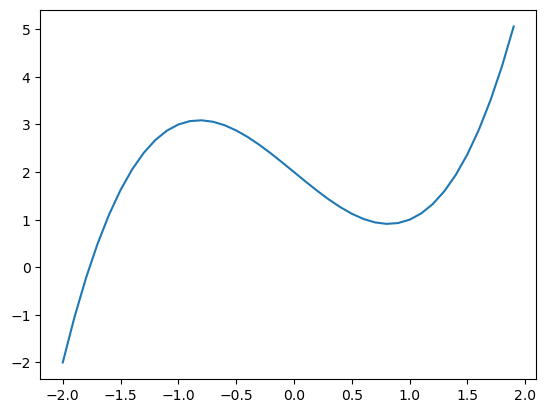

In [54]:
import matplotlib.pyplot as plt
xx = np.arange(-2,2,0.1)
yy = f(xx)

plt.plot(xx, yy)

In [58]:
f = lambda x : x ** 3 - 3 * x ** 2 - 1
df = lambda x : 3*x**2 - 6*x

In [56]:
nmax = 100
tol = 1e-12

x0 = 1

Rt_f = Newton(f, df, x0, nmax, tol, 1e-12)
print('root of fucntion f = ',Rt_f)

n    x(n)                 f(x(n))
0    1.0000000000e+00    -3.000e+00
1    0.0000000000e+00    -1.000e+00
small derivative
root of fucntion f =  None


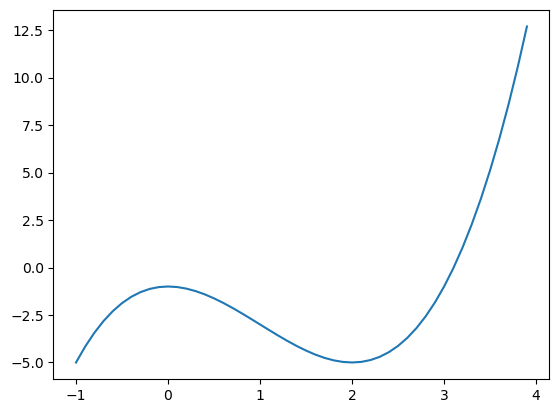

In [60]:
xx = np.arange(-1,4,0.1)
yy = f(xx)

plt.plot(xx, yy)